In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# 2) Load the dataset
data = pd.read_csv('D://Smartbridge - DS//titanic.csv')

In [54]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


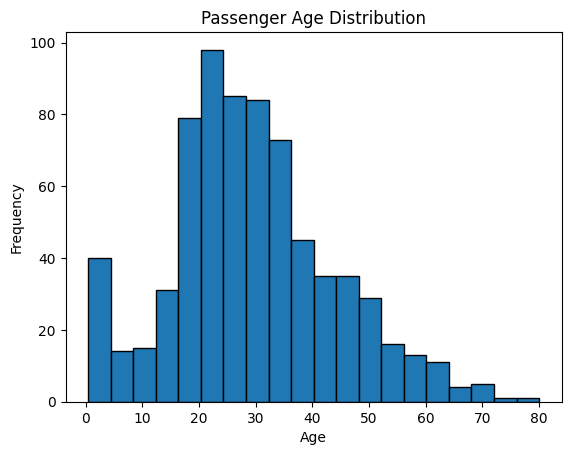

In [14]:
# 3a) Univariate Analysis

plt.hist(data['age'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Passenger Age Distribution')
plt.show()

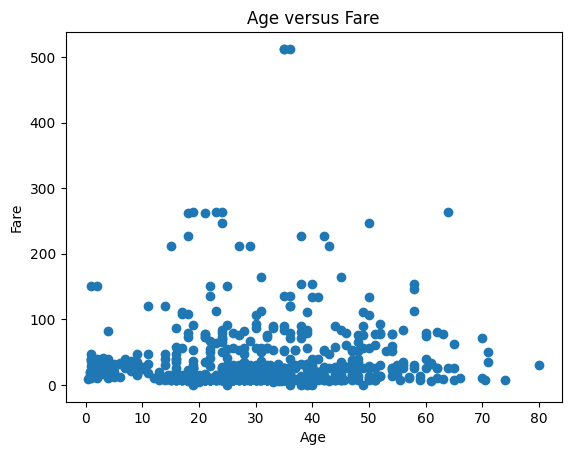

In [17]:
# 3b) Bivariate Analysis
plt.scatter(data['age'], data['fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age Vs Fare')
plt.show()

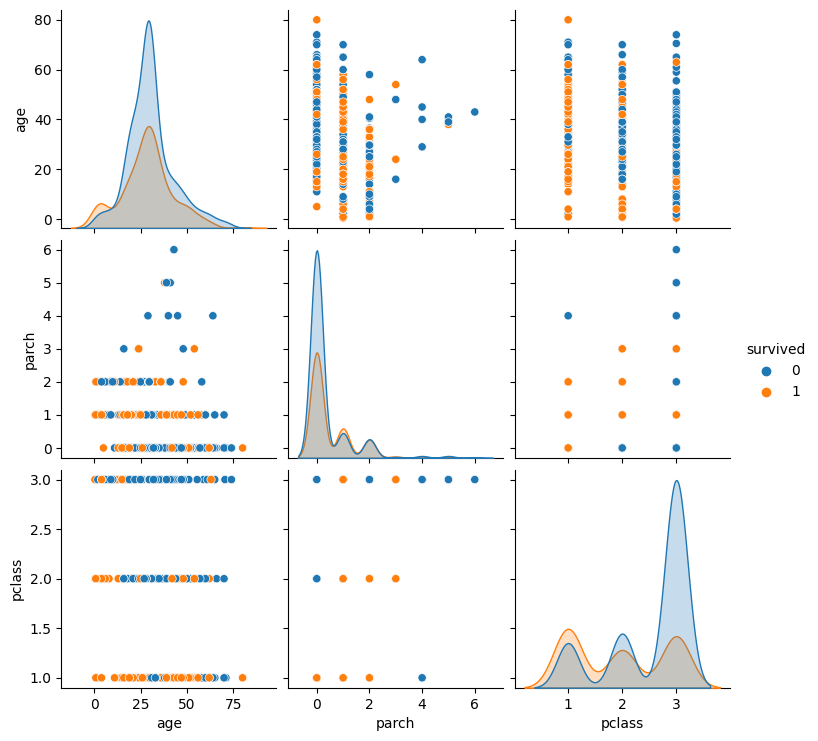

In [78]:
# 3c) Multivariate Analysis
import seaborn as sns
sns.pairplot(data=data, vars=['age', 'parch', 'pclass'], hue='survived')
plt.show()

In [80]:
# 4) Perform descriptive statistics on the dataset.
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [90]:
#5. Handle the Missing values.
# Handling missing Numerical data
median_age = data['age'].median()
median_age
data['age'].fillna(median_age, inplace=True)

In [96]:
# Handling missing Categorical data
#replace categorical data by mode
data["embarked"] = data["embarked"].fillna(data["embarked"].value_counts().index[0])
data["embark_town"] = data["embark_town"].fillna(data["embark_town"].value_counts().index[0])

In [97]:
#No of missing values in data
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1d90507b340>,
 'caps': [<matplotlib.lines.Line2D at 0x1d90507b8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d90507b070>],
 'medians': [<matplotlib.lines.Line2D at 0x1d90507be80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d905072190>],
 'means': []}

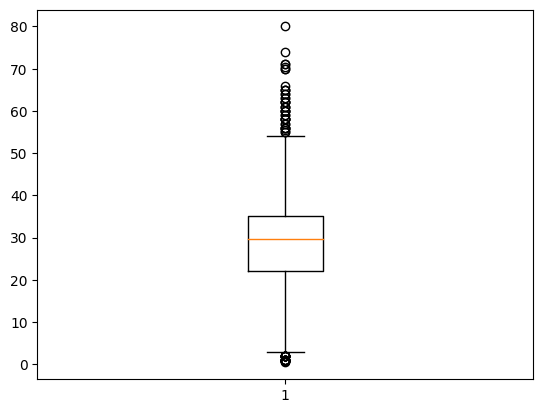

In [101]:
#6. Find the outliers and replace the outliers
plt.boxplot(data["age"])

In [102]:
Q3 = data["age"].quantile(0.75)
Q1 = data["age"].quantile(0.25)
IQR = Q3 - Q1
IQR
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
print("Upper Limit:",upper_lim)
print("Lower Limit:",lower_lim)

Upper Limit: 54.5
Lower Limit: 2.5


{'whiskers': [<matplotlib.lines.Line2D at 0x1d9051453d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d905145970>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d905145100>],
 'medians': [<matplotlib.lines.Line2D at 0x1d905145f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d90514d220>],
 'means': []}

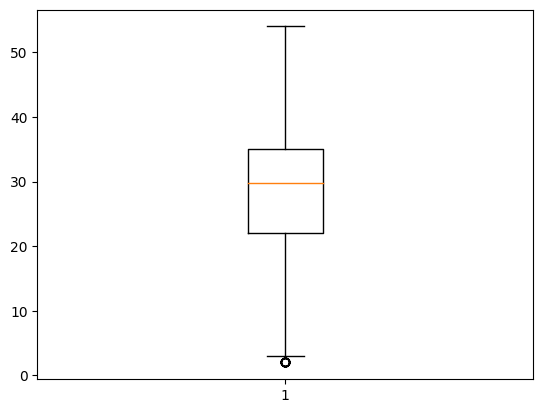

In [103]:
from scipy.stats.mstats import winsorize
data["age"].quantile(0.02)
data["age"].quantile(0.95)
s = winsorize(data["age"], (0.02,0.05))
plt.boxplot(s)

In [85]:
#7. Check for Categorical columns and perform encoding.
categorical_columns = data.select_dtypes(include=['object']).columns
encoded_data = pd.get_dummies(data, columns=categorical_columns)

# Display the encoded data
print(encoded_data)

     survived  pclass        age  sibsp  parch     fare  adult_male  alone  \
0           0       3  22.000000      1      0   7.2500        True  False   
1           1       1  38.000000      1      0  71.2833       False  False   
2           1       3  26.000000      0      0   7.9250       False   True   
3           1       1  35.000000      1      0  53.1000       False  False   
4           0       3  35.000000      0      0   8.0500        True   True   
..        ...     ...        ...    ...    ...      ...         ...    ...   
886         0       2  27.000000      0      0  13.0000        True   True   
887         1       1  19.000000      0      0  30.0000       False   True   
888         0       3  29.699118      1      2  23.4500       False  False   
889         1       1  26.000000      0      0  30.0000        True   True   
890         0       3  32.000000      0      0   7.7500        True   True   

     sex_female  sex_male  ...  deck_C  deck_D  deck_E  deck_F 

In [99]:
#8. Split the data into dependent and independent variables.

X = data.drop('survived', axis=1)  
Y = data['survived'] 

print("Independent Variables:\n")
print(X.head())

print("\nDependent Variables:\n")
print(Y.head())

Independent Variables:

   pclass     sex   age  sibsp  parch     fare embarked  class    who  \
0       3    male  22.0      1      0   7.2500        S  Third    man   
1       1  female  38.0      1      0  71.2833        C  First  woman   
2       3  female  26.0      0      0   7.9250        S  Third  woman   
3       1  female  35.0      1      0  53.1000        S  First  woman   
4       3    male  35.0      0      0   8.0500        S  Third    man   

   adult_male deck  embark_town alive  alone  
0        True    C  Southampton    no  False  
1       False    C    Cherbourg   yes  False  
2       False    C  Southampton   yes   True  
3       False    C  Southampton   yes  False  
4        True    C  Southampton    no   True  

Dependent Variables:

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


In [88]:
#9. Scale the independent variables
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
columns_to_scale = ['age', 'fare']
scaler = StandardScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])
X[columns_to_scale]

,age,fare
0,-0.592481,-0.502445
1,0.638789,0.786845
2,-0.284663,-0.488854
3,0.407926,0.420730
4,0.407926,-0.486337
...,...,...
886,-0.207709,-0.386671
887,-0.823344,-0.044381
888,0.000000,-0.176263
889,-0.284663,-0.044381


In [51]:
#10. Split the data into training and testing
from sklearn.model_selection import train_test_split

X = data.drop('survived', axis=1)
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("TRAINING SET:\n", X_train.head)
print("\n\nTESTING SET:\n", X_test.head)

TRAINING SET:
 <bound method NDFrame.head of      pclass     sex   age  sibsp  parch      fare embarked   class    who  \
331       1    male  45.5      0      0   28.5000        S   First    man   
733       2    male  23.0      0      0   13.0000        S  Second    man   
382       3    male  32.0      0      0    7.9250        S   Third    man   
704       3    male  26.0      1      0    7.8542        S   Third    man   
813       3  female   6.0      4      2   31.2750        S   Third  child   
..      ...     ...   ...    ...    ...       ...      ...     ...    ...   
106       3  female  21.0      0      0    7.6500        S   Third  woman   
270       1    male   NaN      0      0   31.0000        S   First    man   
860       3    male  41.0      2      0   14.1083        S   Third    man   
435       1  female  14.0      1      2  120.0000        S   First  child   
102       1    male  21.0      0      1   77.2875        S   First    man   

     adult_male deck  embark_t

In [77]:
print(f"Train size - {len(X_train)}\ntest size - {len(X_test)}")

train size - 712
test size - 179
